In [25]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [26]:
path = '/Users/HP Spectre/OneDrive - student.kit.edu/uni/Master/Lissabon Kurse/Intelligent Systems/IntSysGroup6/'

data = pd.read_csv(path+'Project/data/robot_inverse_kinematics_dataset.csv')

In [27]:
x = data.iloc[:,6:]
q = data.iloc[:,0:6]
x_numpy = x.to_numpy()
q_numpy = q.to_numpy()


In [28]:
for i in range(6):
    print(q_numpy[:,i].shape)

(15000,)
(15000,)
(15000,)
(15000,)
(15000,)
(15000,)


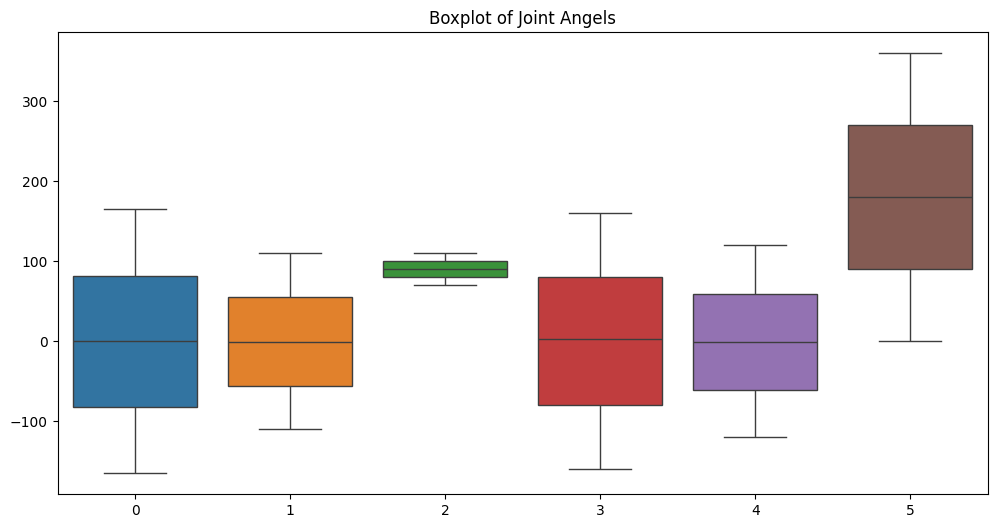

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=np.degrees(q_numpy))
plt.title("Boxplot of Joint Angels")
plt.show()

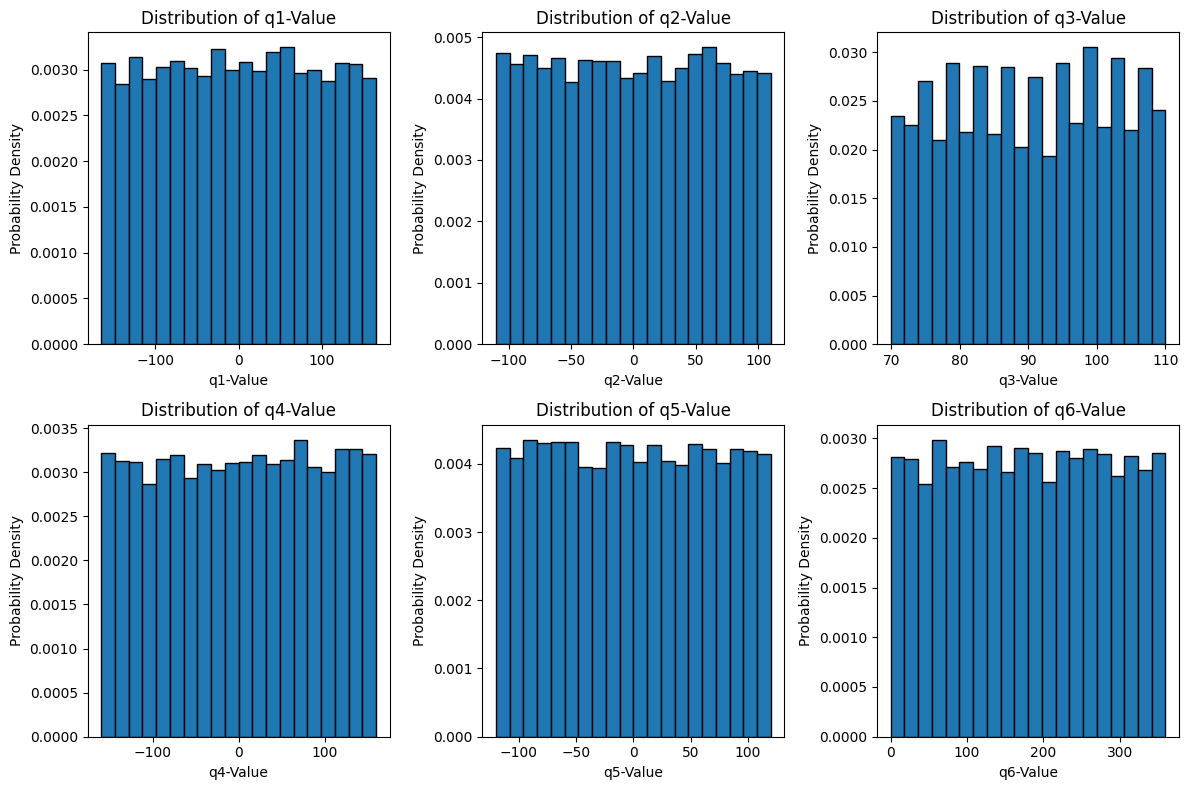

In [33]:
joint_angles = ['q1', 'q2', 'q3', 'q4', 'q5', 'q6']
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, joint in enumerate(joint_angles):
    row, col = divmod(i, 3)  # Calculate the current row and column index
    joint_data = np.degrees(q[joint].values)
    
    # Create a histogram in the respective subplot
    axes[row, col].hist(joint_data, bins=20, density=True, edgecolor='k')
    
    # Set the title and labels for each subplot
    axes[row, col].set_title(f'Distribution of {joint}-Value')
    axes[row, col].set_xlabel(f'{joint}-Value')
    axes[row, col].set_ylabel('Probability Density')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

In [7]:
std_deviation = q.std(axis=0)
max_rad = q.max(axis=0)
min_rad = q.min(axis=0)
output = ""
for column in q.columns:
    output += f"{column} std: {math.degrees(std_deviation[column])}, range: ({math.degrees(min_rad[column])} to {math.degrees(max_rad[column])})\n"
print(output)
max_co = x.max(axis=0)
min_co = x.min(axis=0)
output = ""
for column in x.columns:
    output += f"{column} range :  ({(100*min_co[column])} to {(100*max_co[column])}) in cm\n"

print(output)


q1 std: 94.82656472113784, range: (-165.0118449976771 to 165.0118449976771)
q2 std: 63.63279662066304, range: (-110.00789666511805 to 110.00789666511805)
q3 std: 11.55422003325776, range: (69.90085100596043 to 110.00789666511805)
q4 std: 92.81144039750652, range: (-159.85522484149968 to 159.85522484149968)
q5 std: 69.39149997703744, range: (-119.74817918234204 to 119.74817918234204)
q6 std: 103.72510848371033, range: (0.025267438765269302 to 359.817495342157)

x range :  (-28.999999999999996 to 29.2) in cm
y range :  (-29.799999999999997 to 29.7) in cm
z range :  (-2.08 to 49.0) in cm



In [8]:
# Sample data points, where each point is a combination of 3 inputs

# Create an empty set to store unique combinations
unique_combinations = set()

# Check if each combination is unique
for point in x:
    if point in unique_combinations:
        print(f"Combination {point} is not unique.")
    else:
        unique_combinations.add(point)
        print(f"Combination {point} is unique.")


Combination x is unique.
Combination y is unique.
Combination z is unique.


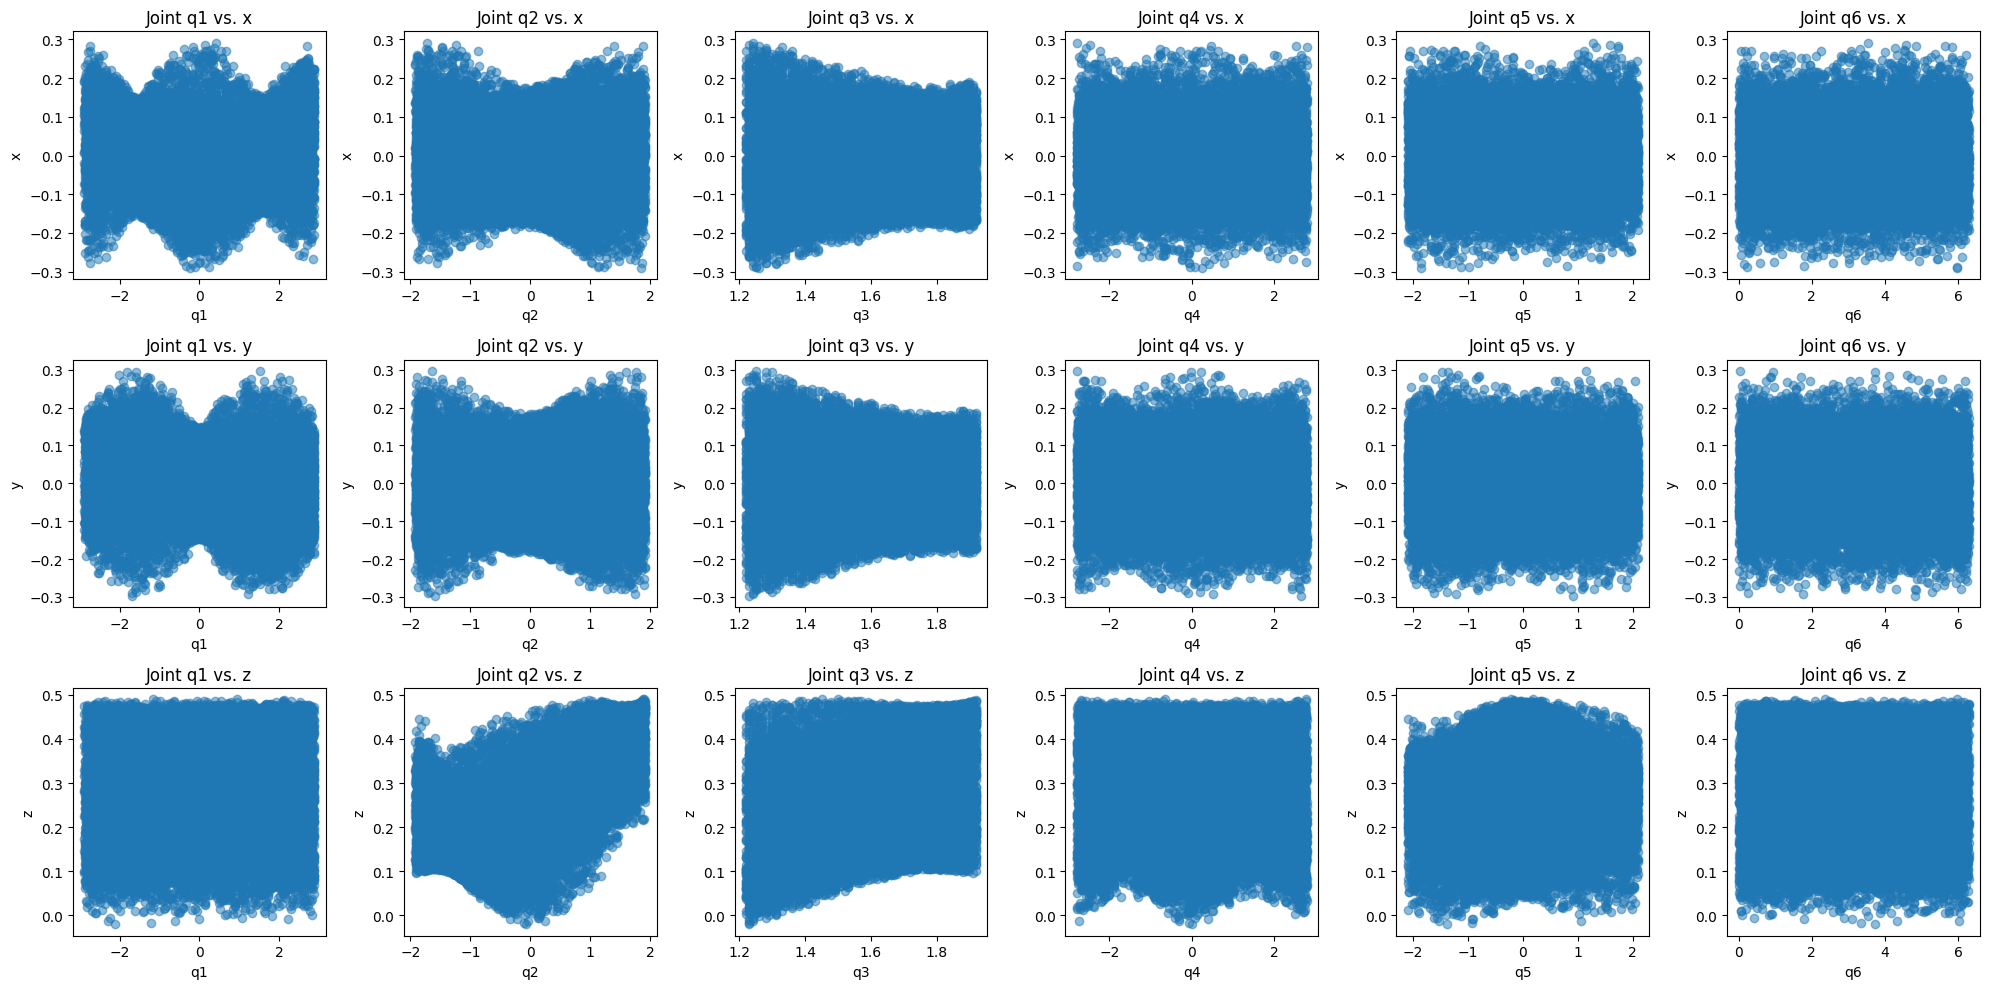

In [9]:
# Create a 2x3 grid of subplots
fig, axes = plt.subplots(3, 6, figsize=(20, 10))

joint_labels = ['q1', 'q2', 'q3', 'q4', 'q5', 'q6']
coordinate_labels = ['x', 'y', 'z']

for i, joint_label in enumerate(joint_labels):
    for j, coordinate_label in enumerate(coordinate_labels):
        ax = axes[j, i]

        ax.scatter(data[joint_label], data[coordinate_label], alpha=0.5)
        ax.set_xlabel(joint_label)
        ax.set_ylabel(coordinate_label)
        ax.set_title(f'Joint {joint_label} vs. {coordinate_label}')

plt.tight_layout()
plt.show()



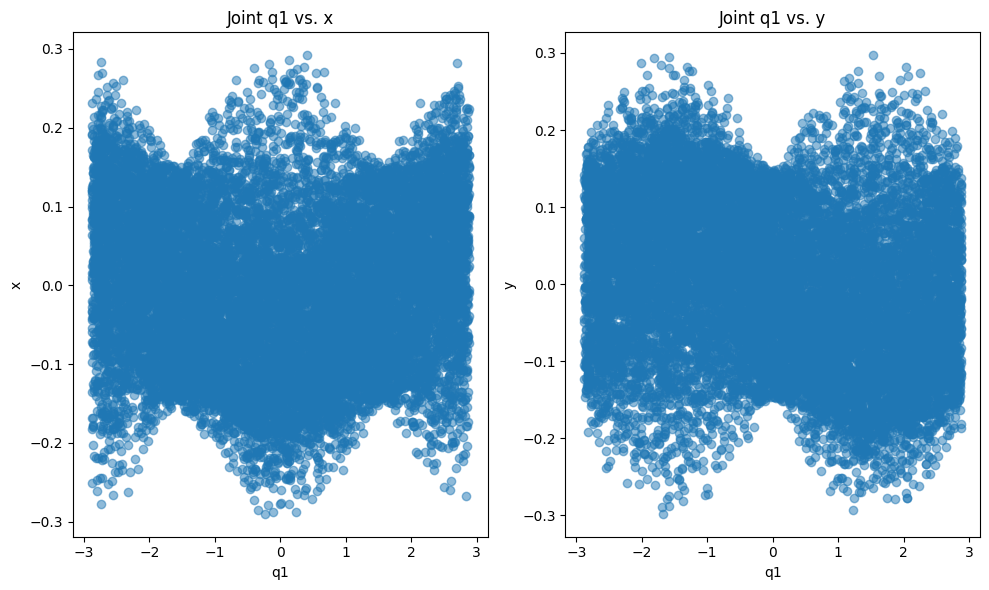

In [46]:
# Create a 2x3 grid of subplots
fig, axe1s = plt.subplots(1, 2, figsize=(10, 6))

joint_labels = ['q1']
coordinate_labels = ['x', 'y']


for j, coordinate_label in enumerate(coordinate_labels):
    ax = axe1s[j]

    ax.scatter(data['q1'], data[coordinate_label], alpha=0.5)
    ax.set_xlabel('q1')
    ax.set_ylabel(coordinate_label)
    ax.set_title(f'Joint q1 vs. {coordinate_label}')

plt.tight_layout()
plt.show()

In [10]:
'''
    Checking what points are closer than a sepcific treshhold to each other. 
    Creatinf a list like [point1_pair1, point2_pair1] while not revesing the order like [point2_pair1,point1_pair1]
'''

# 0.1 is 10 cm 
distance_threshold = 0.005 # 5 mm

coordinates = data[['x', 'y', 'z']].values

distances = np.linalg.norm(coordinates[:, np.newaxis] - coordinates, axis=2)
processed_pairs = set()
close_points = []
for i, j in np.argwhere((0 < distances) & (distances < distance_threshold)):
    # Ensure that we process the pair in a consistent order
    pair = tuple(sorted((i, j)))
    
    if pair not in processed_pairs:
        close_points.append(pair)
        processed_pairs.add(pair)


In [11]:
x.head

<bound method NDFrame.head of             x        y      z
0     -0.0947  0.15000  0.301
1      0.1420 -0.10000  0.225
2     -0.0833  0.22300  0.206
3      0.1350 -0.03140  0.370
4     -0.0560 -0.22900  0.260
...       ...      ...    ...
14995 -0.1130 -0.12800  0.257
14996  0.0633 -0.03160  0.450
14997  0.1310 -0.16000  0.362
14998  0.0829 -0.01600  0.441
14999 -0.1570 -0.00369  0.254

[15000 rows x 3 columns]>

In [15]:
print(f"In toatal {len(close_points)} close pairs")
for i, j in close_points:
    if i < j:
        joint1 = q.loc[i, ['q1', 'q2', 'q3','q4','q5','q6']]
        joint2 = q.loc[j, ['q1', 'q2', 'q3','q4','q5','q6']]
        point1 = x.loc[i, ['x', 'y', 'z']]
        point2 = x.loc[j, ['x', 'y', 'z']]
        print(f"Points {i} and {j} are close with a distance of {distances[i, j]*100:.2f} cm")   
        print(f"Coordinates of Point {i}: {point1.values}")
        print(f"Coordinates of Point {j}: {point2.values}")
        print(f"Joint Angels of Point {i}: {joint1.values}")
        print(f"Joint Angels of Point {j}: {joint2.values}")

In toatal 1330 close pairs
Points 5 and 2688 are close with a distance of 0.41 cm
Coordinates of Point 5: [-0.168  -0.0712  0.245 ]
Coordinates of Point 2688: [-0.167  -0.0716  0.249 ]
Joint Angels of Point 5: [ 0.762 -0.717  1.86   1.25   0.477  6.11 ]
Joint Angels of Point 2688: [ 0.292 -0.358  1.79   1.3   -0.147  2.66 ]
Points 17 and 10257 are close with a distance of 0.36 cm
Coordinates of Point 17: [-0.0593 -0.144   0.227 ]
Coordinates of Point 10257: [-0.061 -0.141  0.228]
Joint Angels of Point 17: [-0.788 -0.958  1.6    1.4   -1.69   5.18 ]
Joint Angels of Point 10257: [ 0.595 -0.788  1.72  -0.949  0.764  6.27 ]
Points 39 and 9451 are close with a distance of 0.45 cm
Coordinates of Point 39: [-0.0695 -0.0702  0.446 ]
Coordinates of Point 9451: [-0.0676 -0.0708  0.442 ]
Joint Angels of Point 39: [0.797   1.13    1.68    0.665   0.00734 1.65   ]
Joint Angels of Point 9451: [-0.713  1.31   1.86   1.42  -0.738  3.17 ]
Points 44 and 5300 are close with a distance of 0.37 cm
Coordina

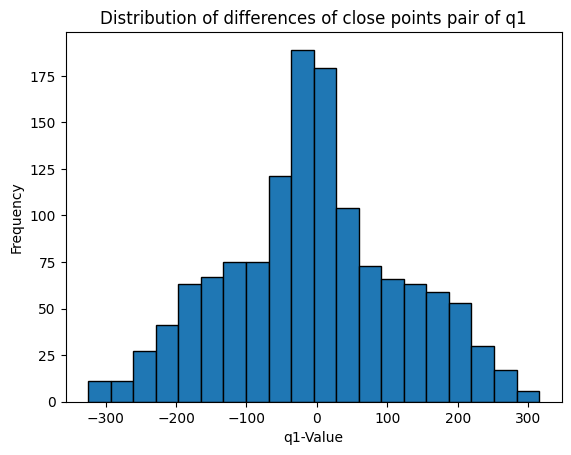

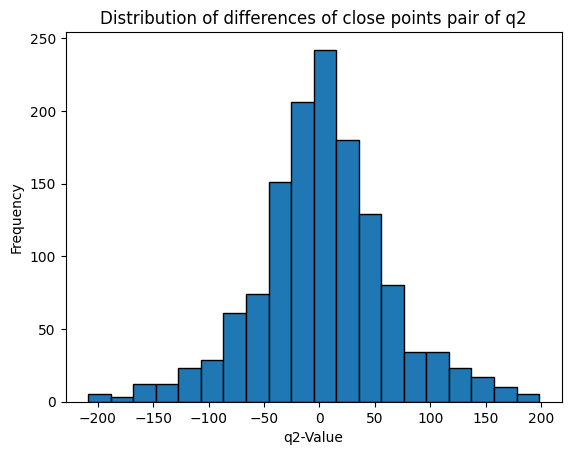

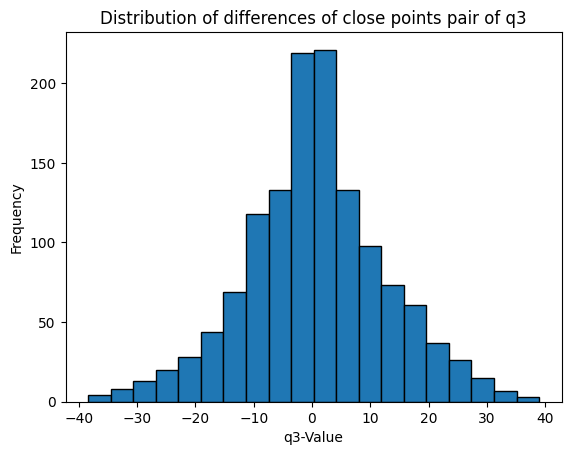

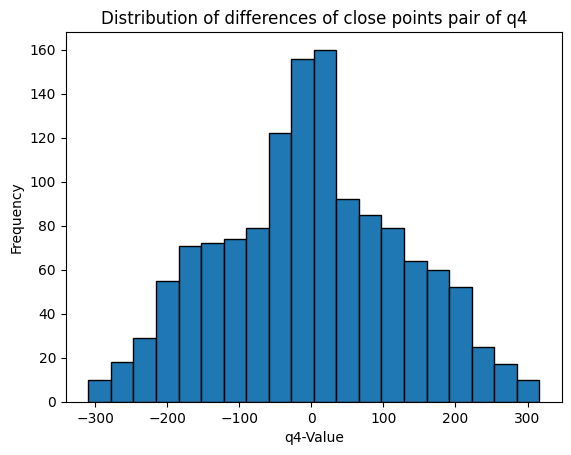

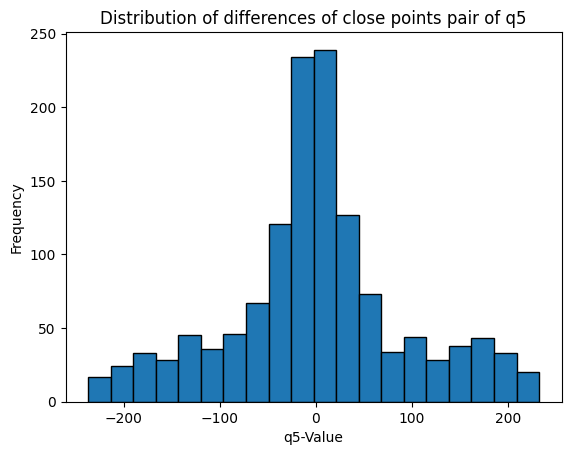

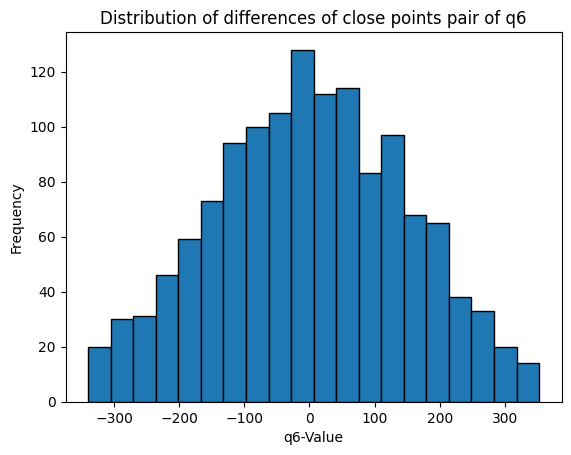

In [17]:
joint_angles = ['q1', 'q2', 'q3', 'q4', 'q5', 'q6']

for joint in joint_angles:
    joint_differences= np.degrees(q[joint].values[np.array(close_points)[:,0]]-q[joint].values[np.array(close_points)[:,1]])
    
    plt.hist(joint_differences, bins=20, edgecolor='k')
    plt.title(f'Distribution of differences of close points pair of {joint}')
    plt.xlabel(f'{joint}-Value')
    plt.ylabel('Frequency')
    plt.show()

In [14]:
# Set the lower and upper bounds for the range (0 to π/2)
lower_bound = 0
upper_bound = np.pi / 2  # π/2 is equivalent to 90 degrees
q_no_6= q[['q1', 'q2','q3', 'q4', 'q5']]
# Count the number of rows where at least one input of a column is outside the range
outside_range = ((q_no_6 < lower_bound) | (q_no_6 > upper_bound)).any(axis=1)
num_rows_left = len(q_no_6[~outside_range])
print(num_rows_left)

94


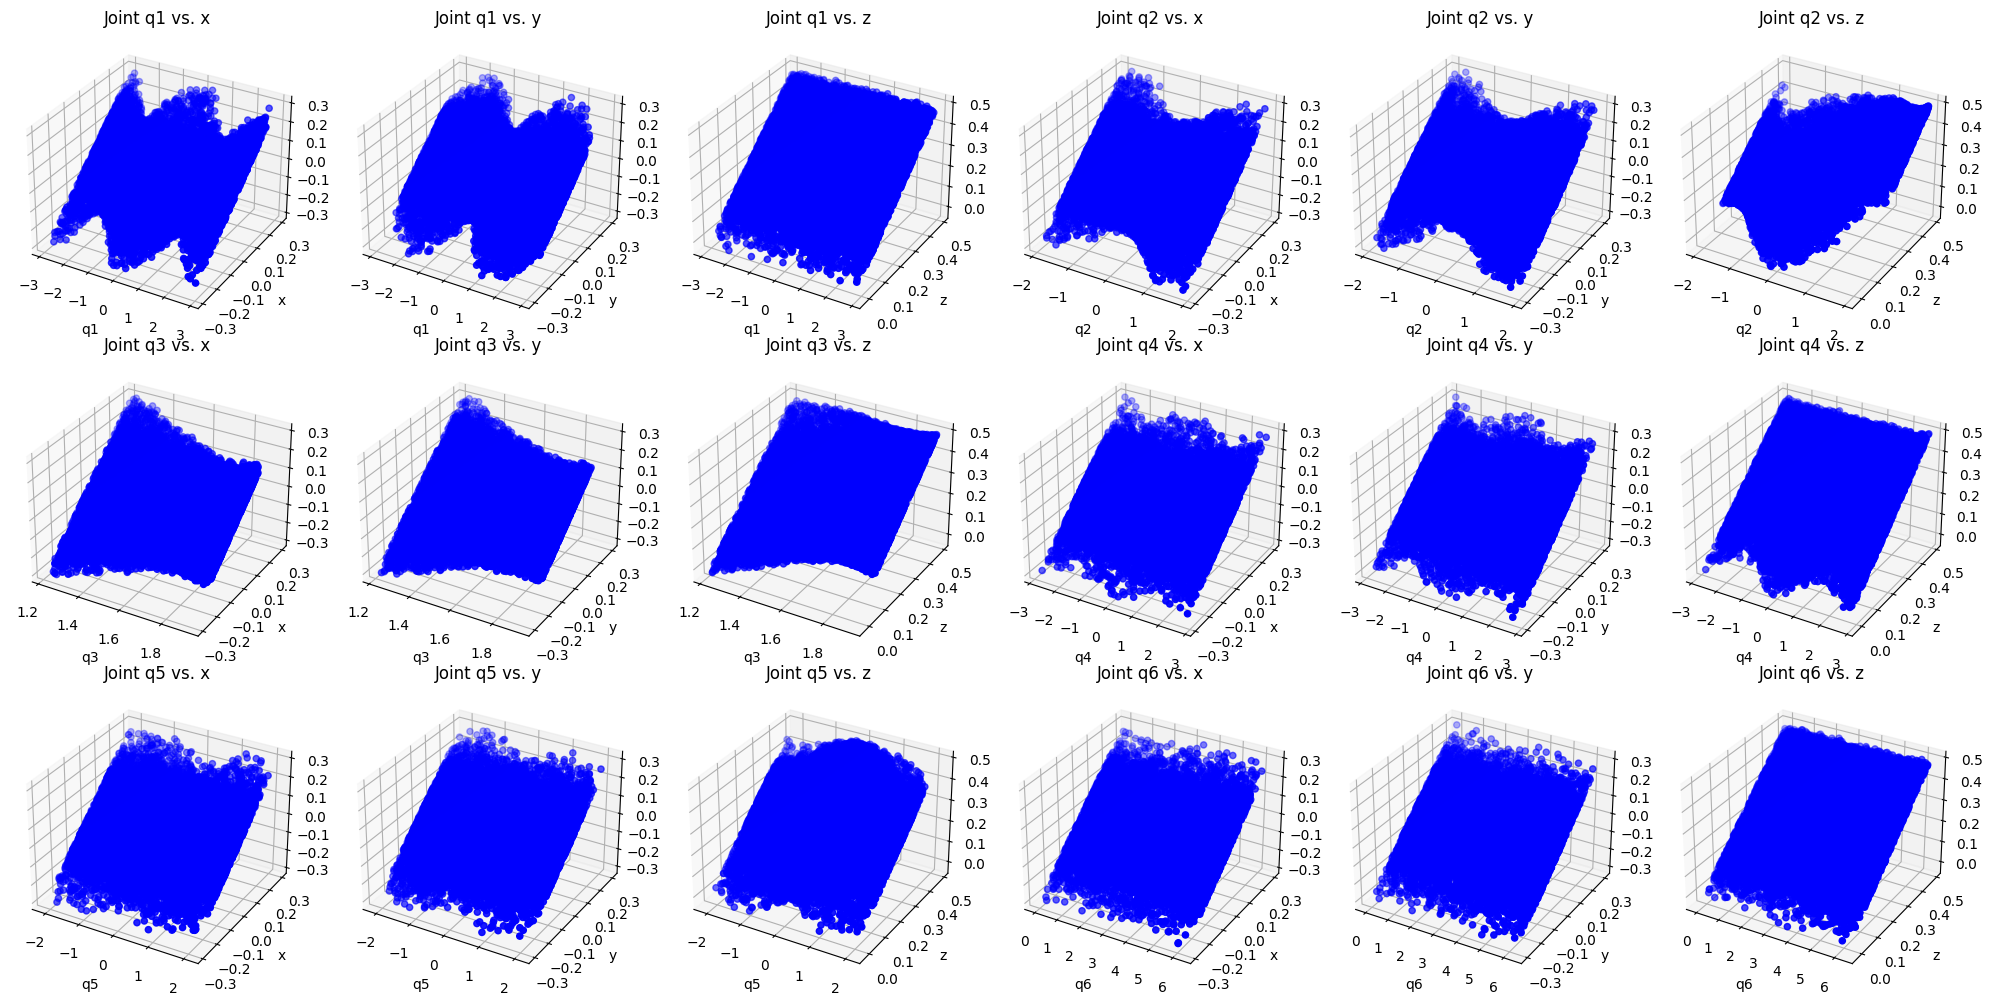

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have data in the format of joint_angles and coordinates
joint_labels = ['q1', 'q2', 'q3', 'q4', 'q5', 'q6']
coordinates = data[['x', 'y', 'z']]

# Create a 3D scatter plot for each joint angle and the combined coordinates
fig = plt.figure(figsize=(20, 10))
plot_number = 1

for joint_label in joint_labels:
    ax = fig.add_subplot(3, 6, plot_number, projection='3d')
    ax.scatter(data[joint_label], coordinates['x'], coordinates['y'], c='b', marker='o')
    ax.set_xlabel(joint_label)
    ax.set_ylabel('x')
    ax.set_zlabel('y')
    ax.set_title(f'Joint {joint_label} vs. (x, y)')
    plot_number += 1

for joint_label in joint_labels:
    ax = fig.add_subplot(3, 6, plot_number, projection='3d')
    ax.scatter(data[joint_label], coordinates['y'], coordinates['z'], c='b', marker='o')
    ax.set_xlabel(joint_label)
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(f'Joint {joint_label} vs. (y, z)')
    plot_number += 1

for joint_label in joint_labels:
    ax = fig.add_subplot(3, 6, plot_number, projection='3d')
    ax.scatter(data[joint_label], coordinates['x'], coordinates['z'], c='b', marker='o')
    ax.set_xlabel(joint_label)
    ax.set_ylabel('x')
    ax.set_zlabel('z')
    ax.set_title(f'Joint {joint_label} vs. (x, z)')
    plot_number += 1

plt.tight_layout()
plt.show()



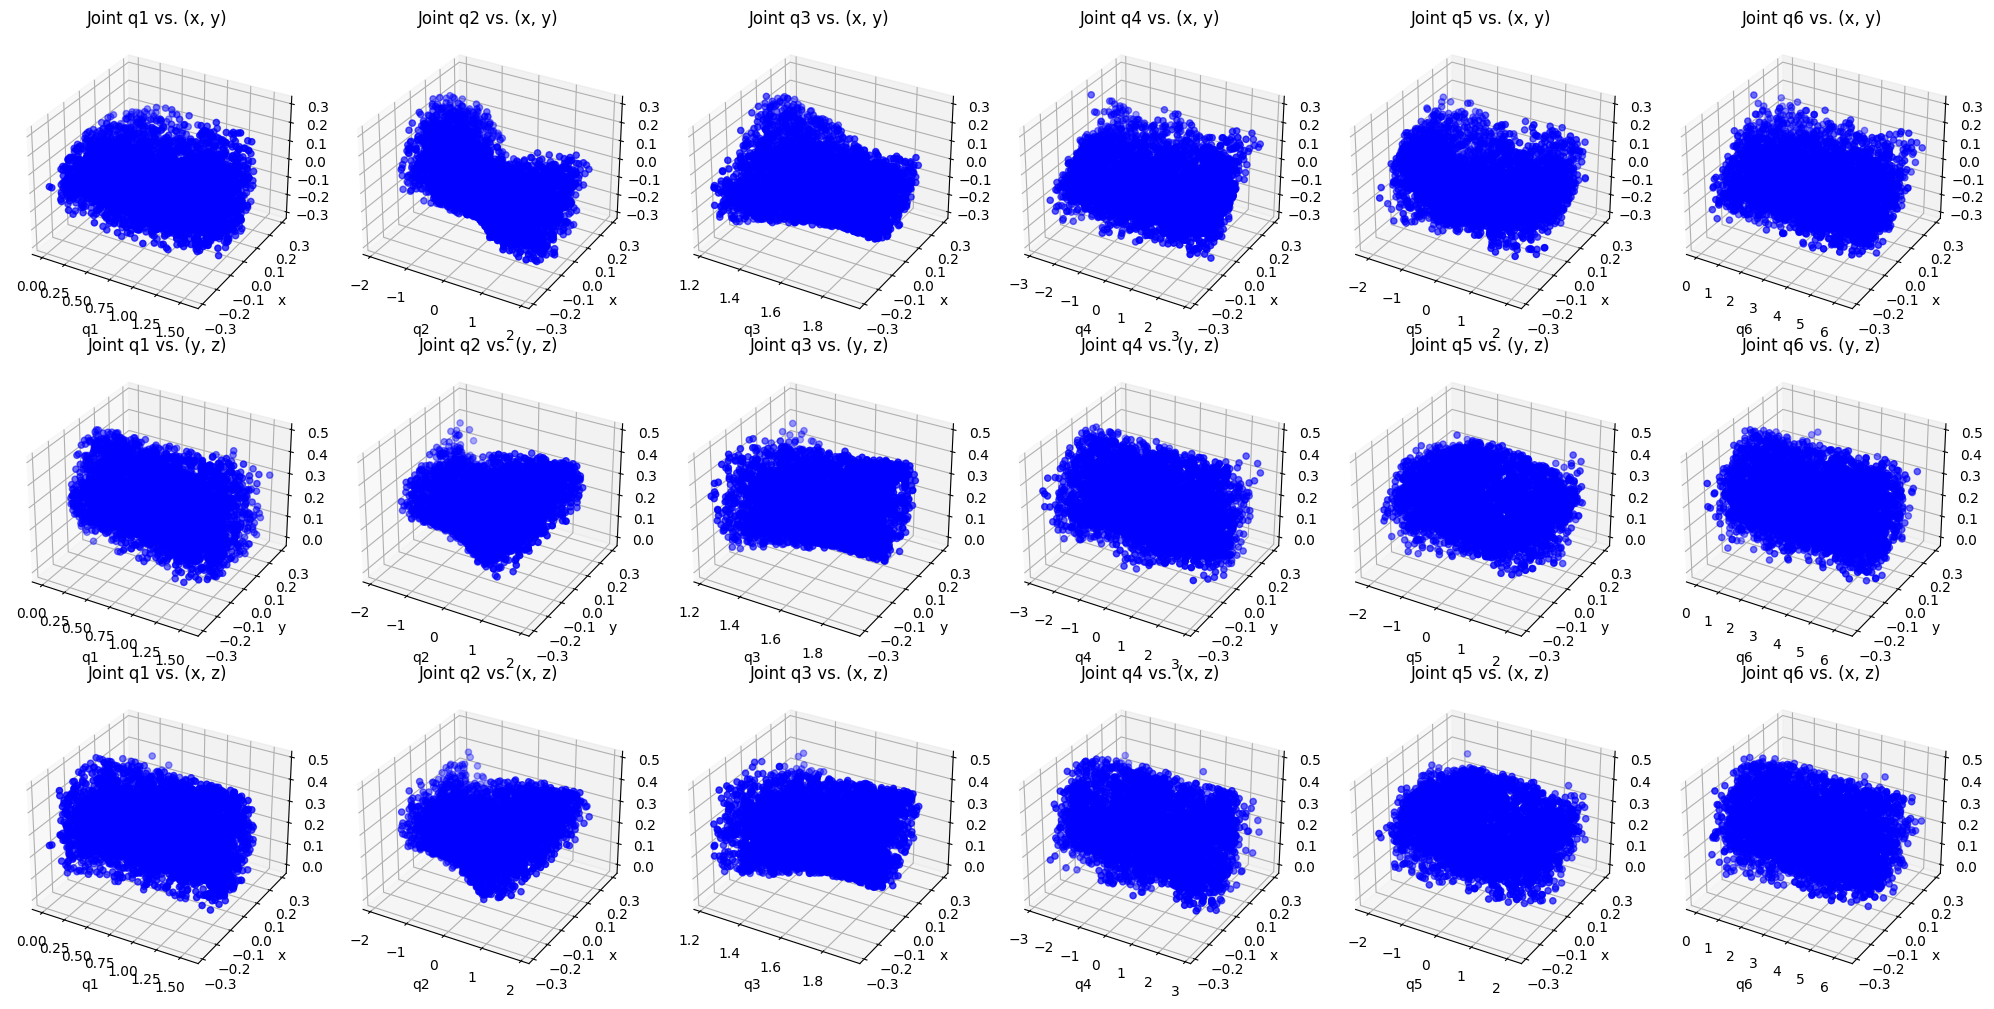

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have data in the format of joint_angles and coordinates
joint_labels = ['q1', 'q2', 'q3', 'q4', 'q5', 'q6']
coordinates = data[['x', 'y', 'z']]

filtered_data = data[(data['q1'] >= lower_bound) & (data['q1'] <= upper_bound)]
lower_bound = 0
upper_bound = np.pi / 2
coordinates = filtered_data.iloc[:, 6:]
q_fil = filtered_data.iloc[:, 0:6]

# Create a 3D scatter plot for each joint angle and the combined coordinates
fig = plt.figure(figsize=(20, 10))
plot_number = 1

for joint_label in joint_labels:
    ax = fig.add_subplot(3, 6, plot_number, projection='3d')
    ax.scatter(q_fil[joint_label], coordinates['x'], coordinates['y'], c='b', marker='o')
    ax.set_xlabel(joint_label)
    ax.set_ylabel('x')
    ax.set_zlabel('y')
    ax.set_title(f'Joint {joint_label} vs. (x, y)')
    plot_number += 1

for joint_label in joint_labels:
    ax = fig.add_subplot(3, 6, plot_number, projection='3d')
    ax.scatter(q_fil[joint_label], coordinates['y'], coordinates['z'], c='b', marker='o')
    ax.set_xlabel(joint_label)
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(f'Joint {joint_label} vs. (y, z)')
    plot_number += 1

for joint_label in joint_labels:
    ax = fig.add_subplot(3, 6, plot_number, projection='3d')
    ax.scatter(q_fil[joint_label], coordinates['x'], coordinates['z'], c='b', marker='o')
    ax.set_xlabel(joint_label)
    ax.set_ylabel('x')
    ax.set_zlabel('z')
    ax.set_title(f'Joint {joint_label} vs. (x, z)')
    plot_number += 1

plt.tight_layout()
plt.show()
